<a href="https://colab.research.google.com/github/apurwa2024/Apurwa_INFO5731_FaLL2024/blob/main/Bhattarai_Apurwa_Assignment_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [1]:
# Function to preprocess the text (remove punctuation and lowercase it)
def preprocess_text(text):
    # Manually remove non-alphanumeric characters
    cleaned_text = ''.join(char.lower() if char.isalnum() or char.isspace() else ' ' for char in text)
    return cleaned_text

# Function to generate n-grams manually
def generate_ngrams(text, n):
    words = text.split()
    ngrams = []
    for i in range(len(words) - n + 1):
        ngrams.append(tuple(words[i:i + n]))
    return ngrams

# Function to count occurrences of items (like n-grams or words)
def count_items(items):
    counts = {}
    for item in items:
        if item in counts:
            counts[item] += 1
        else:
            counts[item] = 1
    return counts

# Function to calculate bigram probabilities manually
def calculate_bigram_probabilities(bigrams, word_counts):
    bigram_probs = {}
    for bigram, count in bigrams.items():
        w1 = bigram[0]
        if w1 in word_counts:
            bigram_probs[bigram] = count / word_counts[w1]
        else:
            bigram_probs[bigram] = 0
    return bigram_probs

# Function to extract noun phrases using a simple heuristic (capitalized words)
def extract_noun_phrases(text):
    words = text.split()
    noun_phrases = []
    phrase = []

    for word in words:
        if word[0].isupper():  # Capitalized words are considered part of noun phrases
            phrase.append(word)
        else:
            if phrase:
                noun_phrases.append(" ".join(phrase))
                phrase = []
    if phrase:
        noun_phrases.append(" ".join(phrase))
    return noun_phrases

# Main function to analyze the reviews
def analyze_reviews(reviews):
    # Step 1: Initialize dictionaries for counts
    trigram_counts = {}
    bigram_counts = {}
    word_counts = {}
    noun_phrase_counts = {}

    # Step 2: Process each review
    for review in reviews:
        cleaned_review = preprocess_text(review)

        # Count unigrams (words)
        words = cleaned_review.split()
        for word in words:
            if word in word_counts:
                word_counts[word] += 1
            else:
                word_counts[word] = 1

        # Generate bigrams and trigrams
        bigrams = generate_ngrams(cleaned_review, 2)
        trigrams = generate_ngrams(cleaned_review, 3)

        # Count bigrams and trigrams
        bigram_counts.update(count_items(bigrams))
        trigram_counts.update(count_items(trigrams))

        # Extract noun phrases and count them
        noun_phrases = extract_noun_phrases(cleaned_review)
        noun_phrase_counts.update(count_items(noun_phrases))

    # Step 3: Calculate bigram probabilities
    bigram_probabilities = calculate_bigram_probabilities(bigram_counts, word_counts)

    # Step 4: Calculate relative frequencies for noun phrases
    total_reviews = len(reviews)
    max_noun_phrase_frequency = max(noun_phrase_counts.values(), default=1)
    noun_phrase_probabilities = {np: count / max_noun_phrase_frequency
                                 for np, count in noun_phrase_counts.items()}

    # Step 5: Print out the results in a table format
    print("Bigram Probabilities:")
    for bigram, prob in bigram_probabilities.items():
        print(f"{bigram}: {prob:.4f}")

    print("\nRelative Probabilities of Noun Phrases:")
    # Create a table with reviews as rows and noun phrases as columns
    print(f"{'Review':<10}", end="")
    for noun_phrase in noun_phrase_counts:
        print(f"{noun_phrase:<25}", end="")
    print()

    for i, review in enumerate(reviews):
        print(f"{i + 1:<10}", end="")
        for noun_phrase in noun_phrase_counts:
            relative_prob = noun_phrase_probabilities.get(noun_phrase, 0)
            print(f"{relative_prob:<25.4f}", end="")
        print()

# Sample dataset (a list of text reviews or tweets)
reviews = [
   "I love this jacket! It's the best one I've ever owned, 10/10.",
    "Terrible quality! The zipper broke after one use.",
    "Decent jacket, but not worth the price.",
    "Best purchase ever! Keeps me warm during winter.",
    "Meh... it's okay. Expected more for the price."

]

# Perform analysis on the sample dataset
analyze_reviews(reviews)






Bigram Probabilities:
('i', 'love'): 0.5000
('love', 'this'): 1.0000
('this', 'jacket'): 1.0000
('jacket', 'it'): 0.5000
('it', 's'): 0.5000
('s', 'the'): 0.5000
('the', 'best'): 0.2500
('best', 'one'): 0.5000
('one', 'i'): 0.5000
('i', 've'): 0.5000
('ve', 'ever'): 1.0000
('ever', 'owned'): 0.5000
('owned', '10'): 1.0000
('10', '10'): 0.5000
('terrible', 'quality'): 1.0000
('quality', 'the'): 1.0000
('the', 'zipper'): 0.2500
('zipper', 'broke'): 1.0000
('broke', 'after'): 1.0000
('after', 'one'): 1.0000
('one', 'use'): 0.5000
('decent', 'jacket'): 1.0000
('jacket', 'but'): 0.5000
('but', 'not'): 1.0000
('not', 'worth'): 1.0000
('worth', 'the'): 1.0000
('the', 'price'): 0.2500
('best', 'purchase'): 0.5000
('purchase', 'ever'): 1.0000
('ever', 'keeps'): 0.5000
('keeps', 'me'): 1.0000
('me', 'warm'): 1.0000
('warm', 'during'): 1.0000
('during', 'winter'): 1.0000
('meh', 'it'): 1.0000
('s', 'okay'): 0.5000
('okay', 'expected'): 1.0000
('expected', 'more'): 1.0000
('more', 'for'): 1.0000
(

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [2]:
# Write your code here
import re
import math

# Sample Reviews
documents = [
    "I love this jacket! It's the best one I've ever owned, 10/10.",
    "Terrible quality! The zipper broke after one use.",
    "Decent jacket, but not worth the price.",
    "Best purchase ever! Keeps me warm during winter.",
    "Meh... it's okay. Expected more for the price."
]

# Query to compare against
query = "I love jackets and warm winter wear."

# Step 1: Preprocess the text (tokenization and cleaning)
def preprocess(text):
    # Lowercase the text
    text = text.lower()
    # Remove all non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Split the text into words (tokens)
    return text.split()

# Step 2: Compute Term Frequency (TF)
def compute_tf(document):
    tf = {}
    doc_len = len(document)
    # Count the frequency of each term in the document
    for term in document:
        if term not in tf:
            tf[term] = 0
        tf[term] += 1
    # Normalize the TF by the total number of terms
    for term in tf:
        tf[term] = tf[term] / doc_len
    return tf

# Step 3: Compute Inverse Document Frequency (IDF)
def compute_idf(documents):
    # Calculate the IDF for all terms
    idf = {}
    total_documents = len(documents)

    # A set to keep track of all unique terms across all documents
    all_terms = set()

    # Iterate through all documents and collect all terms
    for doc in documents:
        for term in doc:
            all_terms.add(term)

    # Now calculate the IDF for each term
    for term in all_terms:
        doc_count = 0
        for doc in documents:
            if term in doc:
                doc_count += 1
        idf[term] = math.log(total_documents / (1 + doc_count))  # Smoothing with +1
    return idf

# Step 4: Compute TF-IDF
def compute_tfidf(tf, idf):
    tfidf = {}
    for term in tf:
        tfidf[term] = tf[term] * idf.get(term, 0)  # Default to 0 if term is not in IDF
    return tfidf

# Step 5: Compute Cosine Similarity
def cosine_similarity(vec1, vec2):
    # Calculate the dot product
    dot_product = 0
    for term in vec1:
        if term in vec2:
            dot_product += vec1[term] * vec2[term]

    # Calculate the magnitudes of the vectors
    magnitude1 = math.sqrt(sum(v * v for v in vec1.values()))
    magnitude2 = math.sqrt(sum(v * v for v in vec2.values()))

    # If either vector has magnitude 0, return similarity 0 (avoid division by zero)
    if magnitude1 == 0 or magnitude2 == 0:
        return 0

    # Cosine similarity formula
    return dot_product / (magnitude1 * magnitude2)

# Step 6: Preprocess all documents and the query
processed_documents = [preprocess(doc) for doc in documents]
processed_query = preprocess(query)

# Step 7: Compute TF for each document
tf_documents = [compute_tf(doc) for doc in processed_documents]

# Step 8: Compute IDF for the entire corpus
idf = compute_idf(processed_documents)

# Step 9: Compute TF-IDF for each document
tfidf_documents = [compute_tfidf(tf, idf) for tf in tf_documents]

# Step 10: Compute TF-IDF for the query
tf_query = compute_tf(processed_query)
tfidf_query = compute_tfidf(tf_query, idf)

# Step 11: Compute Cosine Similarity between the query and each document
cosine_similarities = []
for tfidf_doc in tfidf_documents:
    cosine_sim = cosine_similarity(tfidf_query, tfidf_doc)
    cosine_similarities.append(cosine_sim)

# Step 12: Rank the documents by their cosine similarity to the query
ranked_documents = sorted(enumerate(cosine_similarities), key=lambda x: x[1], reverse=True)

# Step 13: Display the ranked documents with their similarity scores
print("Ranking of documents with respect to the query:")
for idx, score in ranked_documents:
    print(f"Document {idx + 1}: Similarity = {score:.4f}")
    print(f"Text: {documents[idx]}")
    print("-----")







Ranking of documents with respect to the query:
Document 1: Similarity = 0.3906
Text: I love this jacket! It's the best one I've ever owned, 10/10.
-----
Document 4: Similarity = 0.3886
Text: Best purchase ever! Keeps me warm during winter.
-----
Document 2: Similarity = 0.0000
Text: Terrible quality! The zipper broke after one use.
-----
Document 3: Similarity = 0.0000
Text: Decent jacket, but not worth the price.
-----
Document 5: Similarity = 0.0000
Text: Meh... it's okay. Expected more for the price.
-----


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

Word Vector for 'jacket':
[-1.7187477e-03 -2.2227792e-03 -2.5922784e-03  2.7702427e-03
 -6.6078064e-04 -2.2849878e-03 -1.3847963e-03  1.7147087e-03
 -9.5637876e-04 -1.2498867e-03  5.4047507e-04 -9.2543126e-04
 -5.2812020e-04  3.5816390e-04 -9.9264819e-04  2.8397609e-03
  1.3036450e-03 -3.3196211e-03  2.0865332e-03 -2.2514181e-03
  2.5647759e-04  1.4680783e-03 -1.7011249e-03 -7.0355652e-04
  2.6984930e-03 -1.4145974e-03 -2.5454203e-03  3.0859709e-03
 -7.1849901e-04 -1.5731442e-03  2.8569333e-03  1.4277796e-03
  1.4416123e-03  3.0948378e-03 -2.8176936e-03  1.7517734e-03
  6.7978381e-04  1.3960934e-03  5.6596677e-04  1.4880446e-03
  1.4954301e-03  2.0348406e-03 -1.0673658e-03 -1.5252427e-03
 -1.4217218e-04  8.4457797e-04 -1.0877224e-03  2.0192394e-03
  1.3847101e-03  2.5881974e-03  8.5642416e-04  2.7055610e-03
 -4.6240329e-04  2.6926426e-03  1.2390054e-03 -2.6824414e-03
 -1.3112049e-03 -8.2395953e-04  1.6310147e-03 -2.9071968e-04
 -9.4363611e-04  2.6112357e-03  3.1076337e-03 -5.3830940e-0

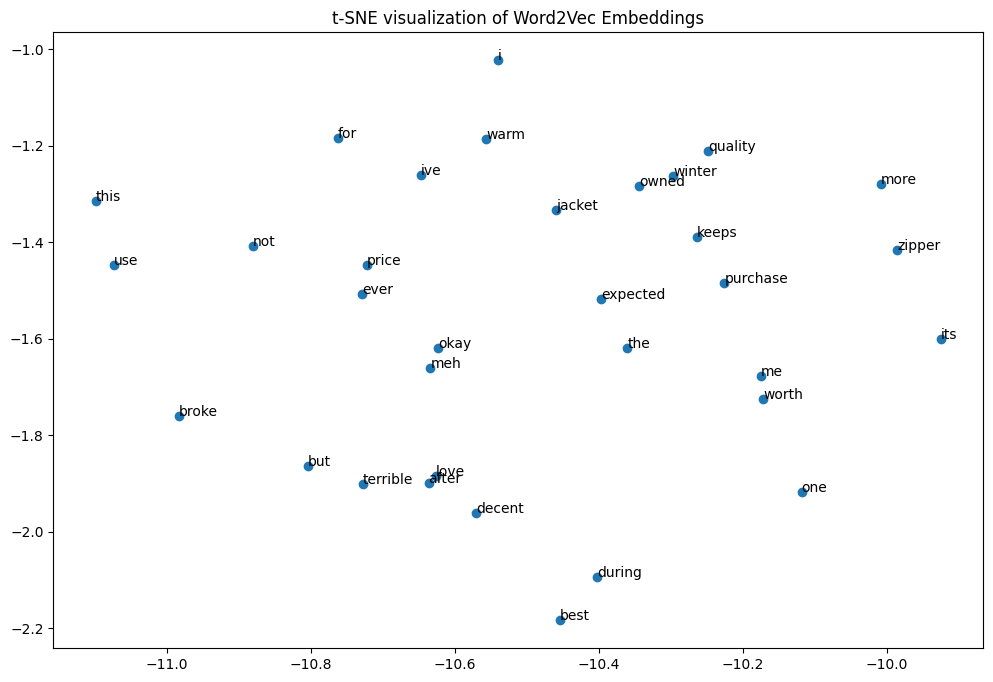

In [3]:

import gensim
from gensim.models import Word2Vec
import re
import nltk
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Sample text from collected data
documents = [
    "I love this jacket! It's the best one I've ever owned, 10/10.",
    "Terrible quality! The zipper broke after one use.",
    "Decent jacket, but not worth the price.",
    "Best purchase ever! Keeps me warm during winter.",
    "Meh... it's okay. Expected more for the price."
]

# Step 1: Preprocessing the data (tokenizing and cleaning)
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text.split()

# Apply preprocessing
processed_documents = [preprocess(doc) for doc in documents]

# Step 2: Train a Word2Vec model (300-dimensional vectors)
model = Word2Vec(sentences=processed_documents, vector_size=300, window=5, min_count=1, sg=1)

# Step 3: Access the word vectors (embedding) for any word
# For example, getting the vector for the word "jacket":
vector_jacket = model.wv['jacket']
print("Word Vector for 'jacket':")
print(vector_jacket)

# Step 4: Visualizing the word embeddings
# We'll use PCA or t-SNE to reduce the dimensionality of the embeddings

# Prepare data for visualization: Select a few words
words = list(model.wv.index_to_key)[:50]
word_vectors = np.array([model.wv[word] for word in words])

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

# Alternatively, use t-SNE for better visualization of word embeddings
# t-SNE tends to give better separation for word embeddings
tsne = TSNE(n_components=2, random_state=0)
tsne_result = tsne.fit_transform(word_vectors)

# Plotting the result
plt.figure(figsize=(12, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])

# Annotate the points with words
for i, word in enumerate(words):
    plt.annotate(word, (tsne_result[i, 0], tsne_result[i, 1]))

plt.title('t-SNE visualization of Word2Vec Embeddings')
plt.show()

# Optionally: Save the trained model
model.save("word2vec_model")








## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file
https://github.com/apurwa2024/Apurwa_INFO5731_FaLL2024/blob/main/sentiment_analysis_reviews.csv

# Link:
/content/sample_data/sentiment_analysis_reviews.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer

Data preprocessing was a little challenging for me and understanding how the model work was also difficult. The thing I enjoyed the most was learning how Word2vec can capture word relationship and meaning in vector form. I would have appreciated a little more time to complete this assignmnet as most of us are new to this topic.